# Guided example and challenge

In [37]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import cross_val_score
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import seaborn as sns

## Dataset

This dataset came from the Thinkful Challenge in Boosted Models it is based on a European Social Survey

In [2]:
df = pd.read_csv((
    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()

In [3]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


## Course content

In [6]:
# Definine outcome and predictors.
# Set our outcome to 0 and 1.
y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]

# Make the categorical variable 'country' into dummies.
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

# Create training and test sets.
offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set.
X_test, y_test = X[offset:], y[offset:]

In [7]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.

params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

In [8]:
# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))


Training set accuracy:
Percent Type I errors: 0.04650845608292417
Percent Type II errors: 0.17607746863066012

Test set accuracy:
Percent Type I errors: 0.06257668711656442
Percent Type II errors: 0.18527607361963191


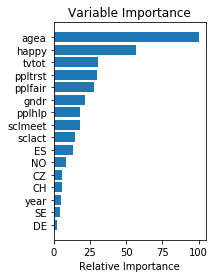

In [10]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [9]:
#I wanted to see the accuracy of their model
cross_val_score(clf, X_test, y_test, cv=5)

array([ 0.62576687,  0.09202454,  0.04907975,  0.11042945,  0.39263804])

## Explore the data

In [41]:
df.describe()

,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
count,8.147000e+03,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000
mean,4.022622e+04,6.500307,3.818584,5.574936,6.005155,5.321468,7.708482,5.215908,2.755984,1.496379,47.262182,1.384681
std,6.320721e+05,0.500031,2.008937,2.215745,2.120127,2.166217,1.720839,1.438792,0.901406,0.500018,18.316890,0.486550
min,1.000000e+00,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,1.000000
25%,1.063000e+03,6.000000,2.000000,4.000000,5.000000,4.000000,7.000000,4.000000,2.000000,1.000000,33.000000,1.000000
50%,1.749000e+03,7.000000,4.000000,6.000000,6.000000,5.000000,8.000000,6.000000,3.000000,1.000000,47.000000,1.000000
75%,2.778000e+03,7.000000,5.000000,7.000000,8.000000,7.000000,9.000000,6.000000,3.000000,2.000000,61.000000,2.000000
max,1.100143e+07,7.000000,7.000000,10.000000,10.000000,10.000000,10.000000,7.000000,5.000000,2.000000,114.000000,2.000000


In [11]:
df.shape[1]

13

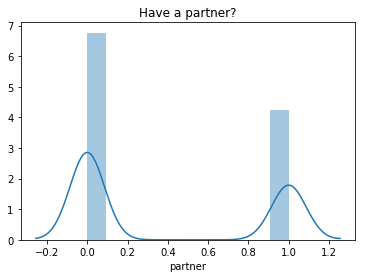

In [45]:
sns.distplot(y);
plt.title('Have a partner?');

This is a slight imbalance between having a partner and not, There were a little less than twice as many people without partners.

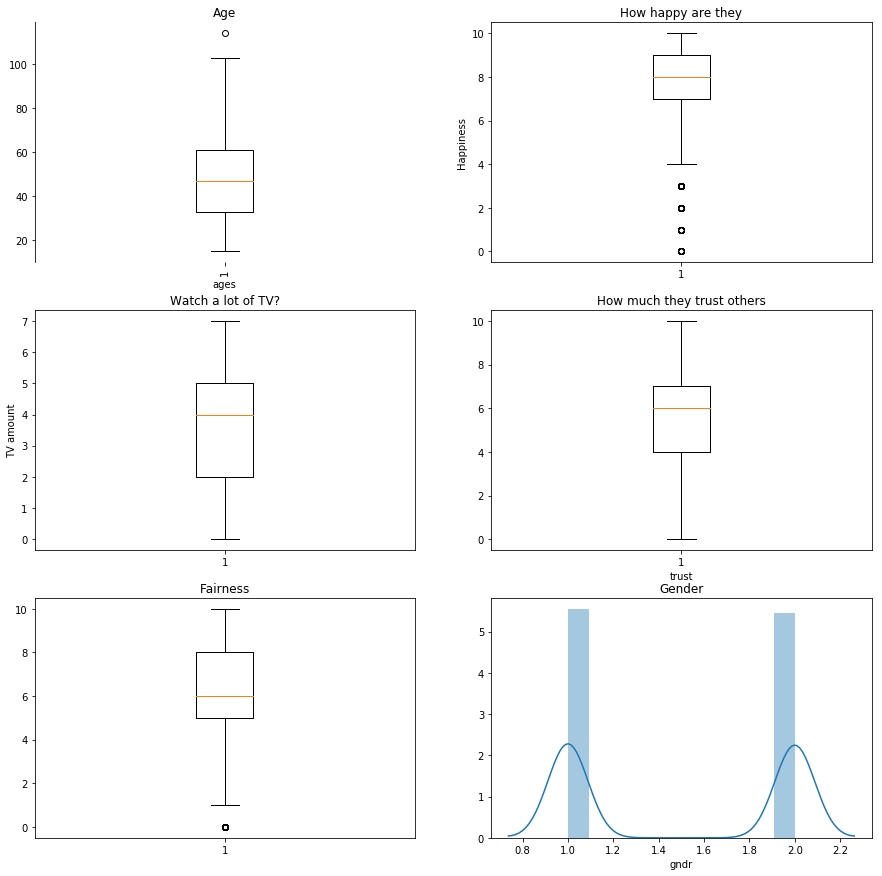

In [52]:
plt.figure(figsize=(15,15))
plt.subplot(3, 2, 1)
plt.boxplot(df['agea'])
plt.title('Age')
plt.xlabel("ages")
plt.xticks(rotation = 90)
sns.despine(left=False, bottom=True)

plt.subplot(3, 2, 2)
plt.boxplot(df['happy'])
plt.title('How happy are they')
plt.ylabel("Happiness")

plt.subplot(3, 2, 3)
plt.boxplot(df['tvtot'])
plt.title('Watch a lot of TV?')
plt.ylabel("TV amount")

plt.subplot(3, 2, 4)
plt.boxplot(df['ppltrst'])
plt.title('How much they trust others')
plt.xlabel("trust")

plt.subplot(3, 2, 5)
plt.boxplot(df['pplfair'])
plt.title("Fairness")

plt.subplot(3, 2, 6)
sns.distplot(df['gndr'])
plt.title("Gender")

plt.show()

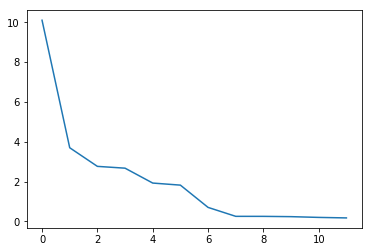

In [12]:
pca_cnty = PCA(n_components=X.shape[1])
pca_cnty_transform = pca_cnty.fit(X)
plt.plot(pca_cnty_transform.explained_variance_[1:13]);

In [13]:
pca = PCA(n_components=4)
pca.fit(X)
X_pca = pca.transform(X)
clf.fit(X_pca, y);

In [27]:
# Put 75% of the data in the training set. The 10% was giving me odd results.
offset = int(X.shape[0] * 0.75)
X_train, y_train = X_pca[:offset], y[:offset]

# And put 25% in the test set.
X_test, y_test = X_pca[offset:], y[offset:]

In [53]:
def best_nest(model, nest, X_train, y_train, X_test, y_test):
    for i in range(250, nest,10):
        model = ensemble.GradientBoostingClassifier(n_estimators = i, max_depth = 2, loss = 'deviance')
        model.fit(X_train, y_train)
        results = np.mean(cross_val_score(model, X_test, y_test, cv=5))
        plt.scatter(i, results)     

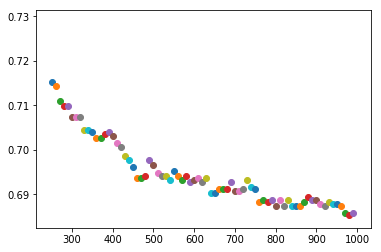

In [54]:
best_nest(clf, 1000, X_train, y_train, X_test, y_test)

In [57]:
def best_nest(model, min_next, max_nest, X_train, y_train, X_test, y_test):
    for i in range(min_next, max_nest,10):
        model = ensemble.GradientBoostingClassifier(n_estimators = i, max_depth = 2, loss = 'deviance')
        model.fit(X_train, y_train)
        results = np.mean(cross_val_score(model, X_test, y_test, cv=5))
        plt.scatter(i, results)  

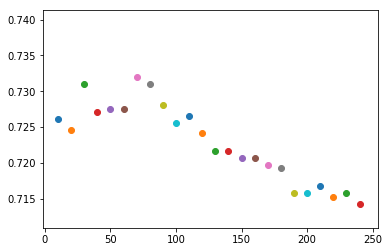

In [58]:
best_nest(clf, 10, 250, X_train, y_train, X_test, y_test)

In [59]:
def best_dep(model, dep, X_train, y_train, X_test, y_test):
    for i in range(2, dep):
        model = ensemble.GradientBoostingClassifier(n_estimators = 70, max_depth = i, loss = 'deviance')
        model.fit(X_train, y_train)
        results = np.mean(cross_val_score(model, X_test, y_test, cv=5))
        plt.scatter(i, results)

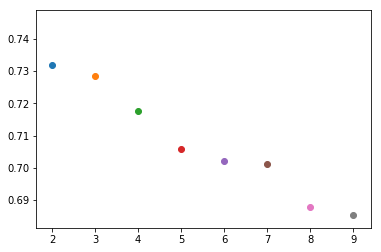

In [60]:
best_dep(clf, 10, X_train, y_train, X_test, y_test)

In [61]:
clf = ensemble.GradientBoostingClassifier(n_estimators = 70, max_depth =2, loss = 'exponential')
clf.fit(X_train, y_train)
cross_val_score(clf, X_test, y_test, cv=5)

array([ 0.73039216,  0.63235294,  0.86764706,  0.61916462,  0.81527094])

In [62]:
clf1 = ensemble.GradientBoostingClassifier(n_estimators = 70, max_depth = 2, loss = 'deviance')
clf1.fit(X_train, y_train)
(cross_val_score(clf1, X_test, y_test, cv=5))

array([ 0.7377451 ,  0.63480392,  0.85784314,  0.61916462,  0.81034483])

In [63]:
predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

In [64]:
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print(('Training set accuracy:\n'
        'Percent Type I errors: {}\n'
        'Percent Type II errors: {}\n\n'
        'Test set accuracy:\n'
        'Percent Type I errors: {}\n'
        'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))


Training set accuracy:
Percent Type I errors: 0.03486088379705401
Percent Type II errors: 0.2099836333878887

Test set accuracy:
Percent Type I errors: 0.06381934216985763
Percent Type II errors: 0.21207658321060383
